In [1]:
import numpy as np
import h5py
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


C:\Users\100682329\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
boxes = h5py.File('1565289740.h5','r')['merged_detections']

min_time = boxes[0,:]
max_time = boxes[2,:]
cen_time = (min_time+max_time)/2

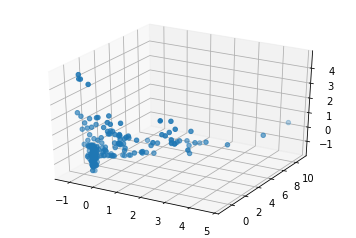

In [3]:
detects = np.where(np.logical_and(cen_time < 200, cen_time > 0))[0]

X = h5py.File('1565289740.h5','r')['features'][:,:].T
Xn = ((X- np.mean(X, axis=0))/np.std(X,axis=0))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xn[:,2], Xn[:,3], Xn[:,5])


In [17]:
def cluster_time(t0,t1, d1=2,d2=3,d3=5):
    detects = np.where(np.logical_and(cen_time < t1, cen_time > t0))[0]
    print('num detections' + str(len(detects)))
    
    db = DBSCAN(eps = 0.6, min_samples = 5)
    fit_data = np.vstack([Xn[detects,d1],Xn[detects,d2],Xn[detects,d3]]).T
    #fit_data = np.vstack([Xn[detects,2],Xn[detects,3]]).T   
    db.fit(fit_data)
    
    labels = db.labels_
    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)
    print('num clusters' + str(n_clusters))
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(Xn[detects,d1], Xn[detects,d2], Xn[detects,d3], c = labels)
    ax.set_xlabel('c4')
    ax.set_ylabel('c6')
    ax.set_zlabel('freq')
    for i,j in enumerate(detects):
        ax.text(Xn[j,d1], Xn[j,d2], Xn[j,d3], str(j))
    
    for l in labels_unique:
        print(detects[np.where(labels == l)])
        
    

num detections30
num clusters3


<IPython.core.display.Javascript object>


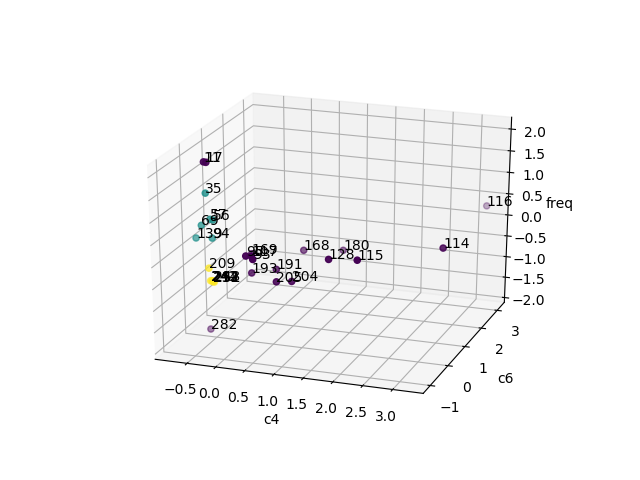

[ 11  17  93  95 114 115 116 117 128 168 169 180 191 193 204 205 282]
[ 35  56  57  69  94 139]
[209 241 242 243 244 251 252]


In [18]:
%matplotlib notebook
cluster_time(0,200, 2,3,0)